# EN4353 - Radar & Navigation

### Assignment 02 

Name: S.Sooriyakumar

Index No: 170599G

Department : E.N.T.C

Batch : 17th

#### Step1: Download and unzip this github repo: https://github.com/Sooriyakumar23/EN4353-Radar-Navigation/tree/main/Assignment-02

#### Step2: Open 'Assignment-02' folder

#### Step3: Run '170599G-Assignment-02.ipynb' using jupyter notebook of anaconda

In [102]:
# Importing necessary libraries

import pandas as pd # To read csv files from local folder to ipynb code file
import numpy as np # To handle arrays and matrices
import matplotlib.pyplot as plt # To plot variety of figures
import seaborn as sns # To plot variety of figures
import cmath, math
from itertools import cycle
cycol = cycle('bgrcmk')

In [51]:
# Reading input csv files 

imag_component_file = pd.read_csv('imag_component.csv', header=None, sep=';', squeeze=True)
real_component_file = pd.read_csv('real_component.csv', header=None, sep=';', squeeze=True)

In [52]:
# First 4 samples of Real component csv file as a dataframe

real_component_file.head(4)

0    3.141626e+08
1    4.904777e+08
2    3.429977e+08
3    1.354798e-02
Name: 0, dtype: float64

In [53]:
# First 4 samples of Imaginary component csv file as a dataframe

imag_component_file.head(4)

0    0.000000
1    5.706968
2    7.981918
3   -0.065220
Name: 0, dtype: float64

In [54]:
# Both file sizes

print ('Imaginary component file size is :', imag_component_file.shape)

print ('Real component file size is :', real_component_file.shape)

Imaginary component file size is : (27000,)
Real component file size is : (27000,)


### Define Parameters

##### Radar Description

Pulse Repetition Frequency = 1800Hz\
Horizontal Beam Width = $ 2 ^\circ $\
Number of Revolutions per minute = 12\
Radar Frequency = 720MHz \
Speed of Light = $3\times10^8 ms^{-1}$

##### Signal Information

Sampling Frequency = 1080 kHz\
Downsample Factor = 20\
No. of Samples =27000\
Range Slots = 30\
No. of Pulses Trasmitted $(N) = \frac{L}{C} = \frac{27000}{30} = 900$ 



After Phase Quadrature Detection Following Quadrature Components are passed into Pulse Doppler Processing Stages.
\
$I(t) = A(t)sin(\theta(t))$\
$Q(t) = A(t)cos(\theta(t))$\
where $\theta(t) = 2\pi f_dt - \pi$ 
and 
$|A(t)| \approx$ for three consecutive samples.

$10^{th}\:sample$ is taken when downsample the signal.


complex signal in $n^{th}$ range slot $W[n] = I[n]+jQ[n]$

Impulse response of MTI canceller $h[n] = \delta[n]-4\delta[n-1]+\delta[n-2]$

In [69]:
# Define parameters

radar_frequency = 72*10e7 # Radar frequency = 720MHz -----> Radar_Fr
prf = 1800 # -----> PRF
horionzontal_beam_angle = 2 # Horizontal beam width -----> theta_H
radar_rotational_speed = 12 # Radar revloution speed in rpm -----> revol_speed
light_speed = 3*10e8 # Speed of light -----> C_light

original_sampling_frequency = (1080*1000) # Original sampling frequency -----> F_s_orig
M = 20 # Down sampling factor

sampling_frequency = original_sampling_frequency / M # Sampling frequency -----> F_s

dataframe_Wn = real_component_file + imag_component_file * 1j # Dataframe of W[n] -----> df_W
Wn = dataframe_Wn.to_numpy() # Dataframe to numpy of W[n] -----> W_n
C = 30

length = len(Wn) # -----> L
number = int(len(Wn)/C) # -----> N

# -----> dict_obj
objects = {'No object':[None,None,0],'Cloud Clutter':[50,1.05,1],'Ground Clutter':[0,None,2],'Rain Clutter':[20,0.9,3],'Birds':[35,1.05,4],'Air-Crafts':[150,0.5,5]}

#### Required parameters for cateogorical object detection

In [70]:
pd.DataFrame(objects)

,No object,Cloud Clutter,Ground Clutter,Rain Clutter,Birds,Air-Crafts
0,NaN,50.00,0.0,20.0,35.00,150.0
1,NaN,1.05,NaN,0.9,1.05,0.5
2,0.0,1.00,2.0,3.0,4.00,5.0


# Question - 1

Given that, 

$ I(t) = A(t) Cos(θ(t)) $\
$ Q(t) = A(t) Sin(θ(t)) $

where $I(t)$ and $Q(t)$ are quadrature components after coherent detection

θ(t) = 2πf dt − π

$ I(t) = A(t) Cos(2πf dt − π) $\
$ Q(t) = A(t) Sin(2πf dt − π) $



* AD Conversion on $ I(t) $
> $t = \hat{n}T_s$, where $T_s = \frac{1}{F_{S(orig)}}$
* $I_0[\hat n]$ = $A(\hat nT_s)cos(2\pi f_d(\hat nT_s)-\pi)$

* MTI :Cancellation :
> $I_1[\hat n] = I_0[\hat n]*h[\hat n] 
\\ = I_0[\hat n]*(\delta[\hat n] - 4\delta[\hat n-1] + \delta[\hat n-2]) 
\\ = I_0[\hat n0] - 4I_0[\hat n-1] + I_0[\hat n-2] 
\\ = A[\hat n]cos[k \hat n-\pi] - 4A[\hat n-1]cos[k(\hat n-1) - \pi] + A[\hat n]cos[k(\hat n-2)-\pi]: k = 2\pi f_dT_s, \\ Let |A[n]| \approx |A[n-1]| \approx |A[n-2]| \approx A :
\\ = A\left\{cos[k \hat n-\pi] - cos\left[k \hat n-(\pi+k)\right] + cos[k \hat n-(\pi+2k) - cos[k \hat n-(\pi+k)]-2cos[k \hat n-(\pi+k)]\right\}
\\ = A\left\{cos[k \hat n-\pi] - cos\left[k \hat n-(\pi+k)\right]  +cos[k \hat n-(\pi+2k)-cos[k \hat n-(\pi+k)] - 2cos[k \hat n-(\pi+k)]\right\}
\\ = 2A\left\{sin\left[k \hat n-\left(\pi+\frac{k}{2}\right)\right]sin\left(\frac{-k}{2}\right) + sin\left[k \hat n-\left(\pi+\frac{3k}{2}\right)\right]sin\left(\frac{k}{2} \right) - cos[k \hat n-(\pi+k)]\right\}
\\ = 2A\left\{sin\left(\frac{k}{2}\right)\left(sin\left[k \hat n-\left(\pi+\frac{3k}{2}\right)\right] - sin\left[k \hat n-\left(\pi+\frac{k}{2}\right)\right]\right) - cos\left[k \hat n-(\pi+k)\right]\right\}
\\ = 2A\left\{sin\left(\frac{k}{2}\right)\left(2cos\left[k \hat n-\left(\pi+\frac{3k}{2}+\pi+\frac{k}{2}\right)\frac{1}{2}\right]sin\left(\frac{-k}{2}\right)\right) - cos[k \hat n-\left(\pi+k\right)]\right\}
\\ = -2A\left\{(sin^2\left(\frac{k}{2}\right)+1\right\}cos[k \hat n-(\pi+k)] 
\\ = 2A\left\{(sin^2\left(\frac{k}{2}\right)+1\right\}cos[k \hat n-k] $

$\\ Downsample  \ by  \ 20 :$
$\\ I[n] = 2A[T_s(20n+10)]\left\{sin^2\left(\frac{2\pi f_d T_s}{2}\right) + 1\right\}cos[2\pi f_d T_s (20n+10-1)]$
$\\ \therefore I[n] = 2A[T_s(20n+10)]\left\{sin^2\left(\pi f_d T_s\right)+1\right\}cos[2\pi f_d T_s (20n+9)]$


$\\ Similarly \ we \ can \ obtain \ Q[n] \ from \ Q(t) \ as \ :$

$\\ Q[n] = 2A[T_s(20n+10)]\left\{sin^2\left(\pi f_d T_s\right) + 1\right\}sin[2\pi f_d T_s (20n+9)] $
$\\ W[n] =I[n] + jQ[n] $\
$\\ W[n] = 2A[T_s(20n+10)]\left(sin^2\left(\pi f_d T_s\right) + 1\right)\left( cos[2\pi f_d T_s (20n+9)] + jsin[2\pi f_d T_s (20n+9)] \right)
$ 

# Question - 2

Range bin of the data matrix can be represented as $W[n] = I[n]+jQ[n]$

Plots of below are coded and presented below: 
> $|W[n]|= \sqrt{I[n]^2+Q[n]^2}$\
$ phase\: of\: W[n]$\
$I[n]$\
$Q[n]$

Ground clutters can be easily filtered by considering $|W[n]|$ ; bins with ground clutter have higher $|W[n]|$.

Simple thresholding like this will works fine ;\
W[n] > Ground clutter => 0 \
W[n] < Ground\:Clutter => W[n]

In [77]:
data_matrix = Wn.reshape(number, C)

phase = np.vectorize(lambda x: cmath.phase(x))
phase_data_matrix = phase(data_matrix)
magnitude_data_matrix = abs(data_matrix)

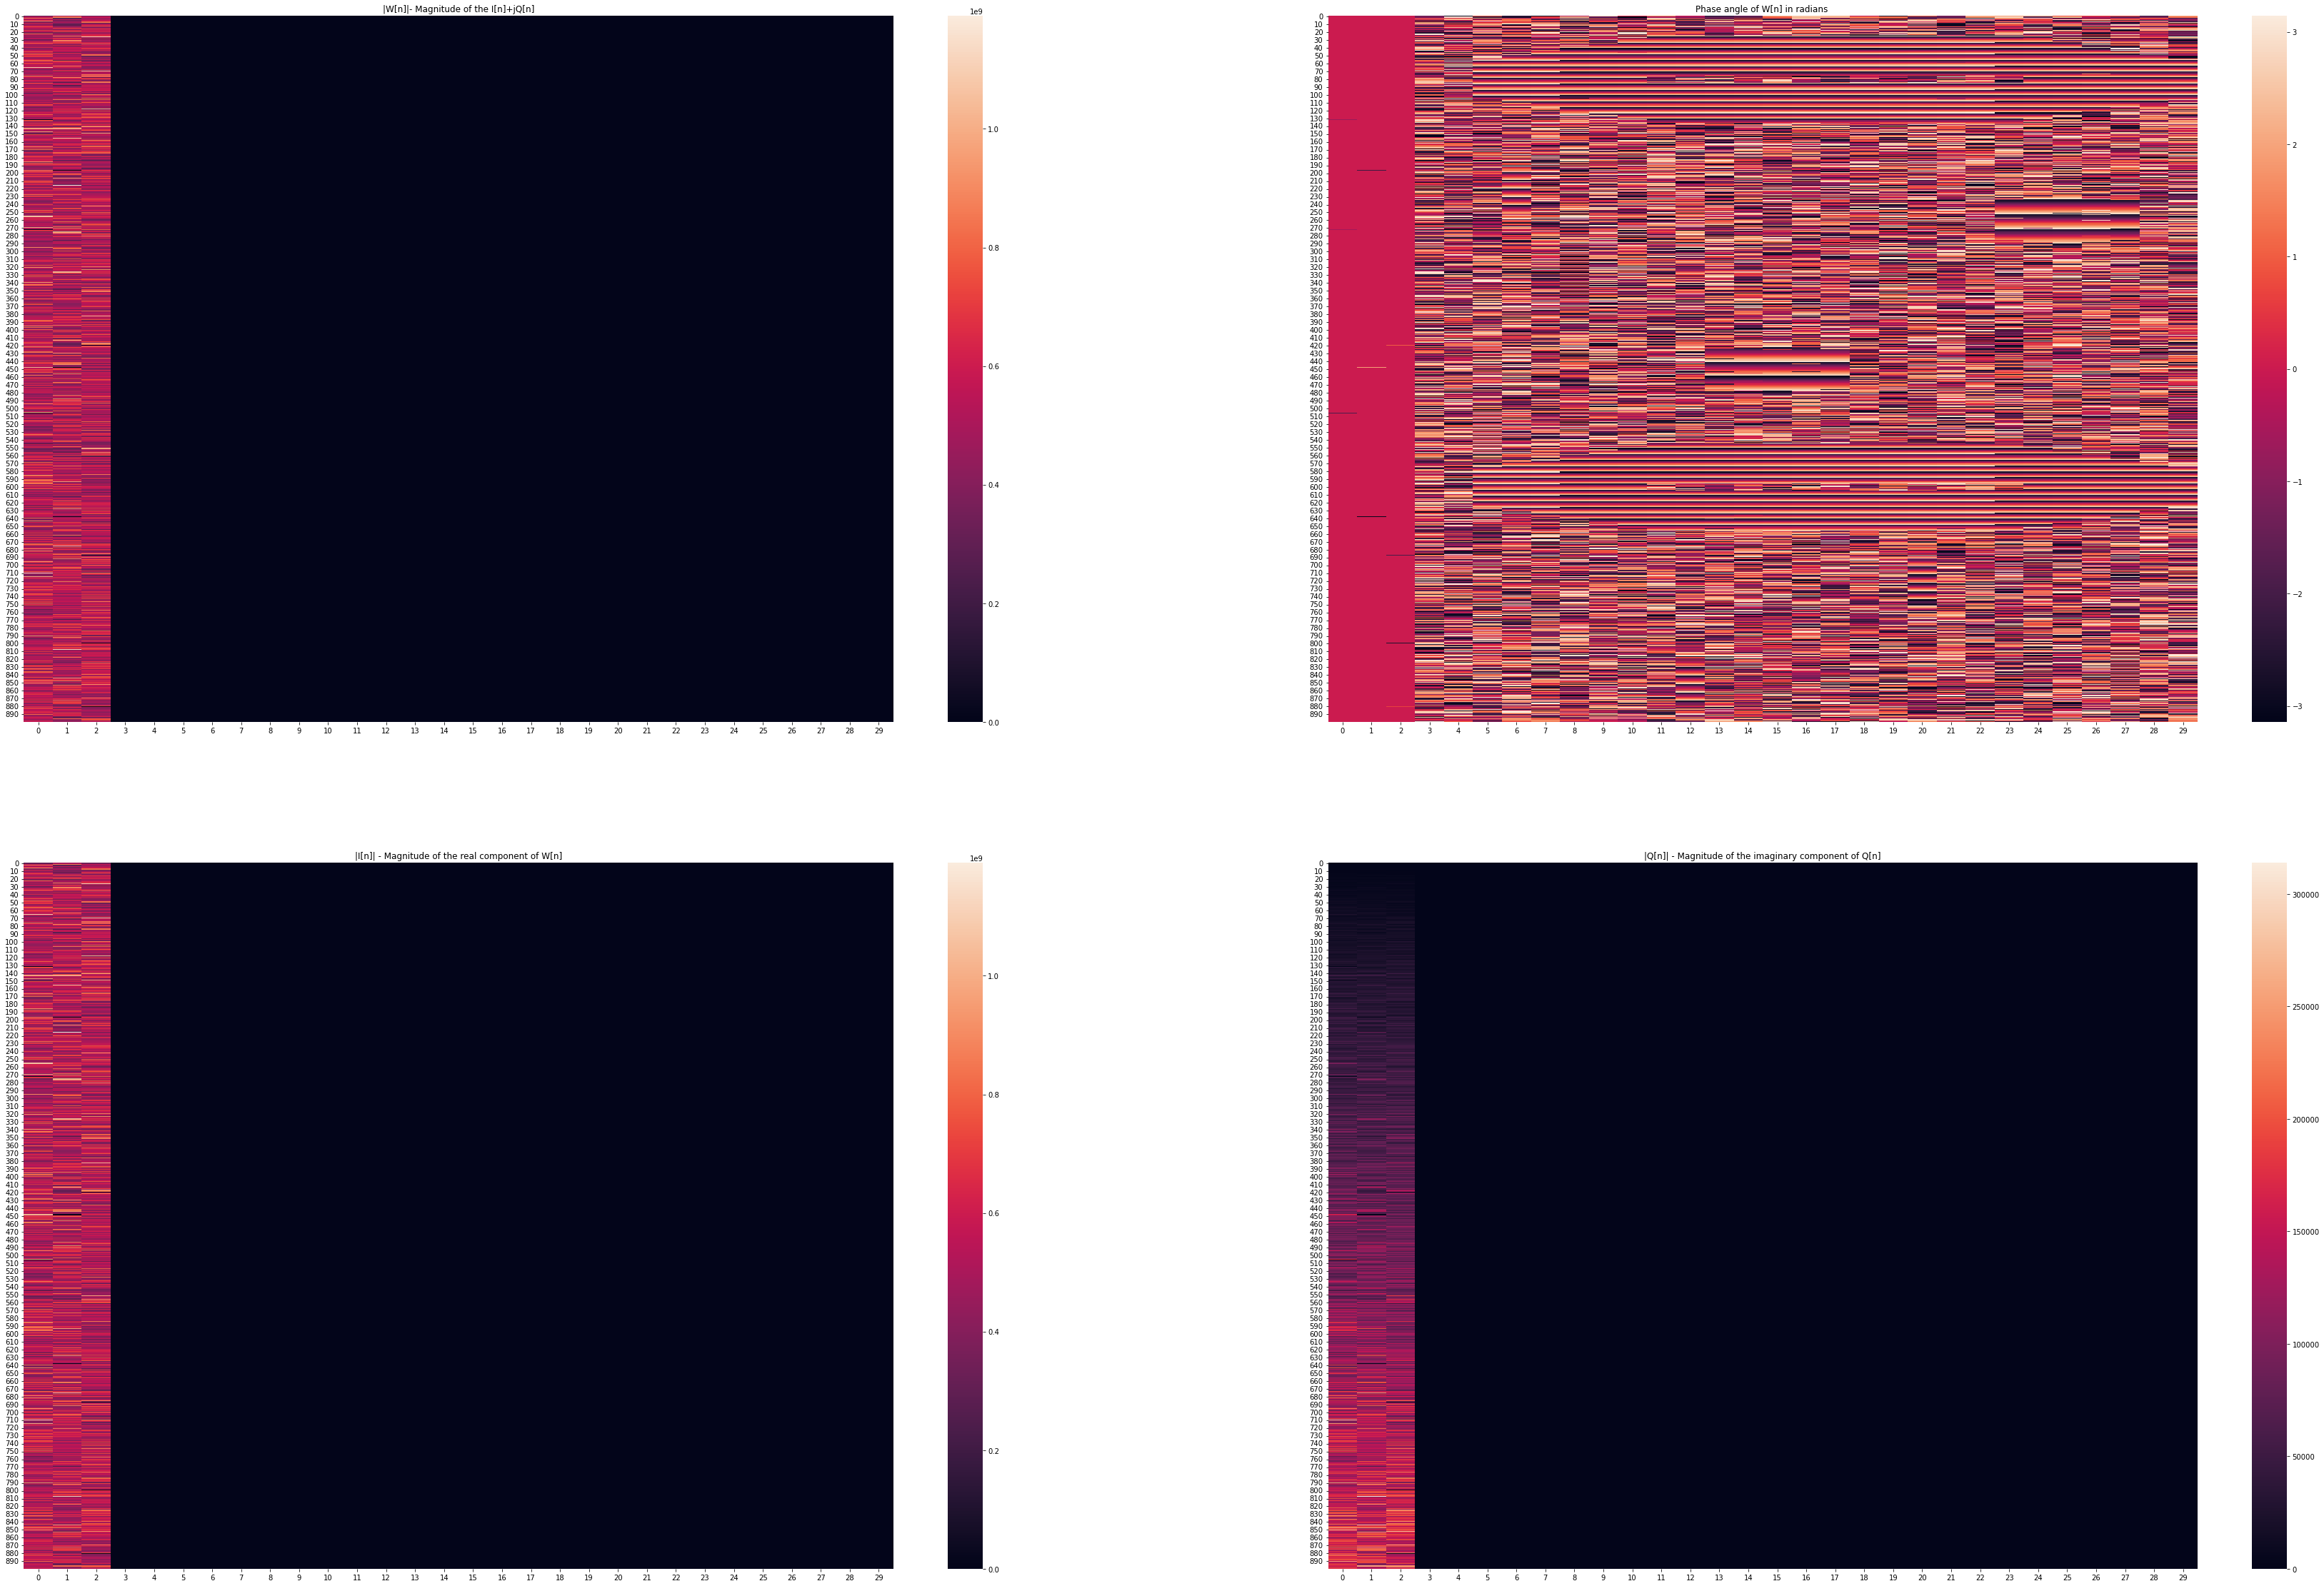

In [84]:
# Plots .....

f,[[axis1,axis2],[axis3,axis4]] = plt.subplots(2,2,figsize=(60,40))

axis1.set_title('|W[n]|- Magnitude of the I[n]+jQ[n]')
g1 = sns.heatmap(magnitude_data_matrix, square=False, annot=False, cbar=True, ax = axis1)

axis2.set_title('Phase angle of W[n] in radians')
g2 = sns.heatmap(phase_data_matrix, square=False, annot=False, cbar=True, ax = axis2)

axis3.set_title('|I[n]| - Magnitude of the real component of W[n]')
g3 = sns.heatmap(data_matrix.real, square=False, annot=False, cbar=True, ax = axis3)

axis4.set_title('|Q[n]| - Magnitude of the imaginary component of Q[n]')
g4 = sns.heatmap(data_matrix.imag, square=False, annot=False, cbar=True, ax = axis4)

# Question - 3

if $f_d \rightarrow 0 \: then\:2\pi f_d T_s (20n+9) \rightarrow0$ 

So, if $\theta(t)$ is small then we can say $f_d \rightarrow 0$ which is ground clutter.

Because of this method can explain the relationship with $f_d$ we have decided to use this as Zero Velocity Filter.

### Zero Velocity Filter and remove any ground clutter present

Since $f_d \rightarrow 0 \: :\:2\pi f_d T_s (20n+9) \rightarrow0$ 

Set the threshold of zero velocity filter to 1e-4 and remove the Ground clutter.

In [153]:
zvf_thresh_value = 10e-4

def zero_velocity_filter_phase(data_matrix, zvf_thresh_value):
    phase_data_matrix = phase(data_matrix)
    filt_data_matrix = np.where(zvf_thresh_value < abs(phase_data_matrix), data_matrix, 0)
    ground_clutter_data_matrix = np.where(zvf_thresh_value < abs(phase_data_matrix), 0, 2)
    return (filt_data_matrix, ground_clutter_data_matrix)

(data_matrix_filt, ground_clutter_data_matrix) = zero_velocity_filter_phase(data_matrix, zvf_thresh_value)

magnitude_data_matrix = abs(data_matrix_filt)

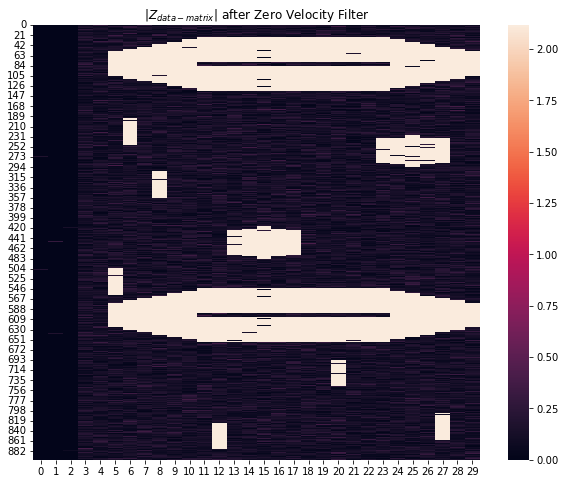

In [154]:
f, axis = plt.subplots(figsize=(10,8))

axis.set_title('$|Z_{data-matrix}| $ after Zero Velocity Filter')

axis = sns.heatmap(magnitude_data_matrix, square=False, annot=False, cbar=True)

# Question - 4

In [148]:
def fourier_frequency_transform_plot(fft_data, dopler_frquency, sampling_frequency, single_bin = 0):
    
    abs_fft_data = np.abs(fft_data) ** 1
    N = len(fft_data)
    positive_frequency = np.arange(0, sampling_frequency/2, step = sampling_frequency/N)
    negative_frequency = np.arange(-sampling_frequency/2, 0, step = sampling_frequency/N)
  
    plt.figure(figsize=(20, 10))
    axis = plt.ylabel('$|W(f)|^2$')
    axis = plt.xlabel('Frequency (Hz)')
    axis = plt.title('FFT representation of W[n]')
    axis = plt.xticks(np.arange(-sampling_frequency/2, sampling_frequency/2,(sampling_frequency*30)/N))
    
    if single_bin:
        current_color = next(cycol)
    else:
        current_color = None
    
    plt.plot(positive_frequency, abs_fft_data[:(N // 2)], color = current_color)
    plt.plot(negative_frequency, abs_fft_data[(N // 2):], color = current_color)

    for keys,frequency in dopler_frquency.items():
        color = next(cycol)
        if frequency != None:
            plt.vlines(x=frequency, ymin=0, ymax=max(abs_fft_data.flatten())+50, linestyles='--', colors=color, label=keys)
            plt.vlines(x=-frequency, ymin=0, ymax=max(abs_fft_data.flatten())+50, linestyles='--', colors=color, label=keys)
  
    handles, labels = plt.gca().get_legend_handles_labels() 
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')
    plt.show()
    return None

In [149]:
dopler = {}

for keys,vals in objects.items():
    thing = vals[0]
    if thing != None:
        dopler[keys] = 2*thing/(light_speed/radar_frequency)
    else:
        dopler[keys] = None

In [150]:
print(dopler)

{'No object': None, 'Cloud Clutter': 240.0, 'Ground Clutter': 0.0, 'Rain Clutter': 96.0, 'Birds': 168.0, 'Air-Crafts': 720.0}


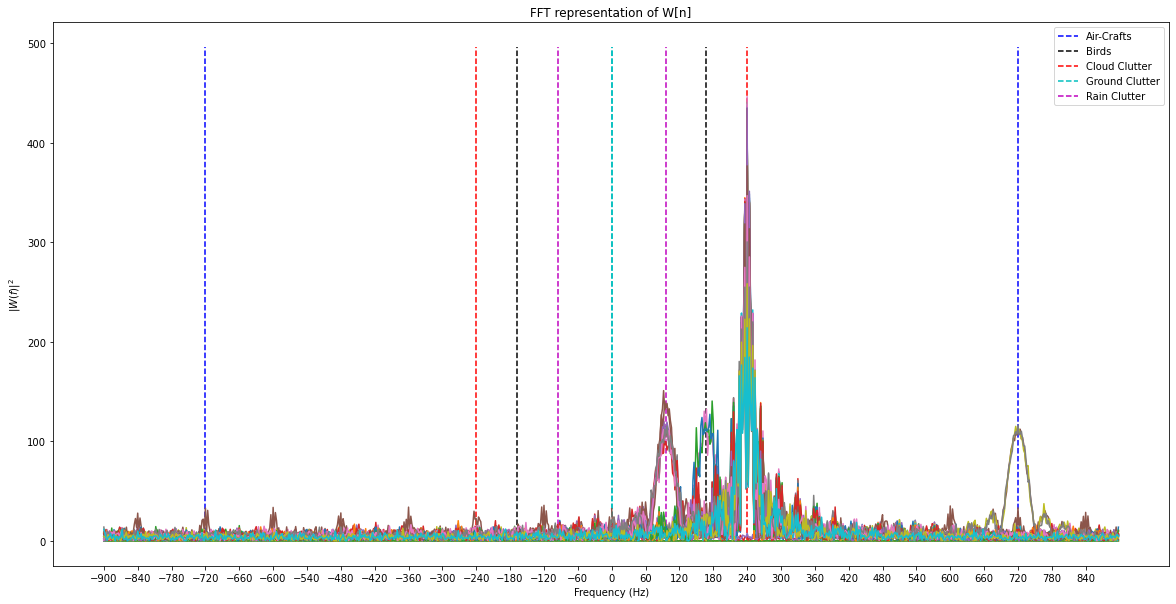

In [151]:
fourier_frequency_transform_data_matrix = np.fft.fft(data_matrix_filt[:,:], axis=0)

fourier_frequency_transform_plot(fourier_frequency_transform_data_matrix, dopler, prf, 0)

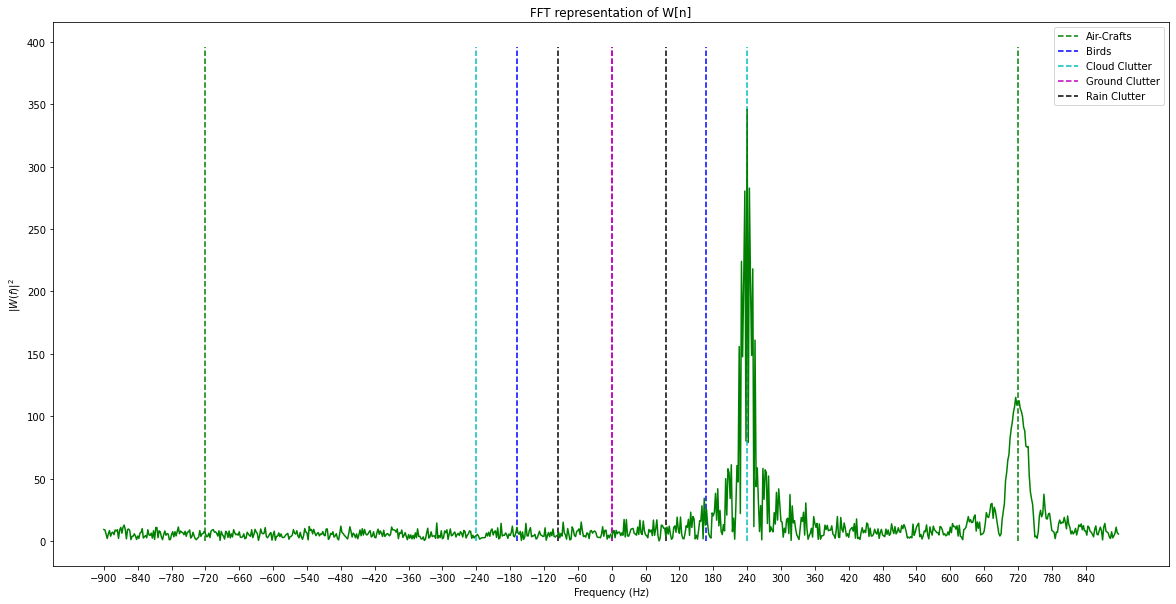

In [152]:
fourier_frequency_transform_plot(fourier_frequency_transform_data_matrix[:,8], dopler, prf, 1)

> ###### Bandwidth of the filter is selected as 72 Hz.

>> $\therefore$ Bandwidth = 36 Hz

In [116]:
bandwidth = 36 # Hz

# Question - 5

> Filter bank implementation : Ideal rectangular filters - Bandpass filters

In [167]:
# Low pass filter

def low_pass_filter(low_frequency, sampling_frequency, N, plot):
    positive_frequency = np.arange(0, sampling_frequency/2, step=sampling_frequency/N)
    positive_H = 1. * (positive_frequency <= low_frequency)
    negative_frequency = np.arange(-sampling_frequency/2, 0, step=sampling_frequency/N)
    negative_H = 1. * (negative_frequency >= -low_frequency)
  
    h = np.concatenate([positive_H, negative_H])
    h = h.reshape(h.shape[0], 1) 
    if plot:
        plt.plot(h)
    return h

In [168]:
# High pass filter

def high_pass_filter(high_frequency, sampling_frequency, N, plot):
    positive_frequency = np.arange(0, sampling_frequency/2, step=sampling_frequency/N)
    positive_H = 1. * (positive_frequency >= high_frequency)
    negative_frequency = np.arange(-sampling_frequency/2, 0, step=sampling_frequency/N)
    negative_H = 1. * (negative_frequency <= -high_frequency)
  
    h = np.concatenate([positive_H, np.flip(negative_H)])
    h = h.reshape(h.shape[0], 1) 
    if plot:
        plt.plot(h)
    return h

In [169]:
# Band pass filter

def band_pass_filter(low_frequency, high_frequency, sampling_frequency, N, plot):
    positive_frequency = np.arange(0, sampling_frequency/2, step=sampling_frequency/N)
    positive_H = 1. * ((positive_frequency >= low_frequency) & (positive_frequency <= high_frequency))
    negative_frequency = np.arange(-sampling_frequency/2, 0, step=sampling_frequency/N)
    negative_H = 0. * ((positive_frequency >= low_frequency) & (positive_frequency <= high_frequency))
  
    h = np.concatenate([positive_H, np.flip(negative_H)])
    h = h.reshape(h.shape[0], 1) 
    if plot:
        plt.plot(h)
    return h   

$W[f]$ is passed through doppler filter bank with different cutoff frequencies.

Output of the doppler filter $[i] = W_i[f]$

$W_i[f]= W[f]*BPF_{[f_c-BW,f_c+BW]}$

$W_i[n] = ifft(W_i[f])$

After getting inverse DFT thresholding is performed.

$\therefore $ Final Output Matrix for filter $[i]$ would be:

$if\: W_{final}[n] > threshold[i] = encode[i]\: otherwise \:0 $

In [171]:
dopler

{'No object': None,
 'Cloud Clutter': 240.0,
 'Ground Clutter': 0.0,
 'Rain Clutter': 96.0,
 'Birds': 168.0,
 'Air-Crafts': 720.0}

In [177]:
# Filter bank implementation

final_dictionary = {}

for keys, vals in dopler.items():
    if (vals !=None and vals!=0):
        print(keys, 'cut off frequencies:', vals-bandwidth, " - ", vals+bandwidth, 'Hz')
    
        band_pass_filter_values = band_pass_filter(vals-bandwidth, vals+bandwidth, prf, N, 0)

        fft_filter_values = np.multiply(fourier_frequency_transform_data_matrix[:,:], band_pass_filter_values)

        data_dopler_filter = np.fft.ifft(fft_filter_values[:,:], axis=0) 

        threshold = objects[keys][1]
        encode = objects[keys][2]
    
        data_matrix_final = (abs(data_dopler_filter) >= threshold) * encode

        final_dictionary[keys] = [data_matrix_final, band_pass_filter_values, abs(data_dopler_filter)]
    
        np.savetxt(keys+".csv", data_matrix_final, delimiter=",")

Cloud Clutter cut off frequencies: 204.0  -  276.0 Hz
Rain Clutter cut off frequencies: 60.0  -  132.0 Hz
Birds cut off frequencies: 132.0  -  204.0 Hz
Air-Crafts cut off frequencies: 684.0  -  756.0 Hz


In [188]:
def heatmap_plot(matrix, dictionary_label, title, cmap):
    f,axis = plt.subplots(figsize=(24,20))
    axis.set_title(title)

    n=len(dictionary_label)
    cmap = sns.color_palette(cmap, n)
    axis = sns.heatmap(matrix, cmap=cmap)

    colorbar = axis.collections[0].colorbar

    r = colorbar.vmax - colorbar.vmin
    colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
    colorbar.set_ticklabels(list(dictionary_label.keys()))
    return None

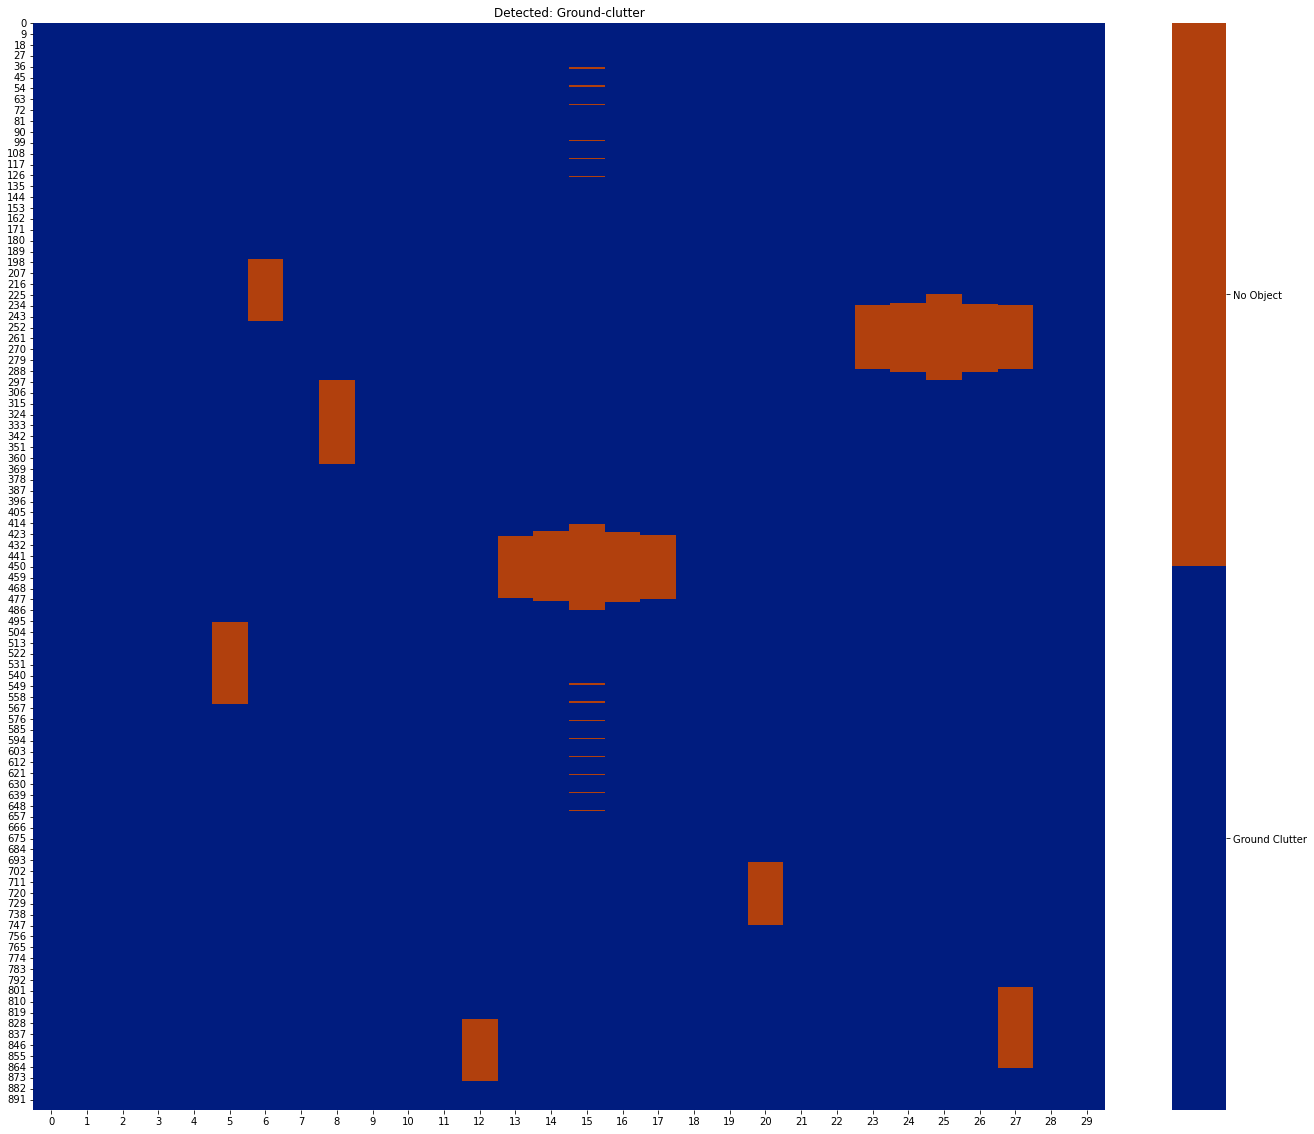

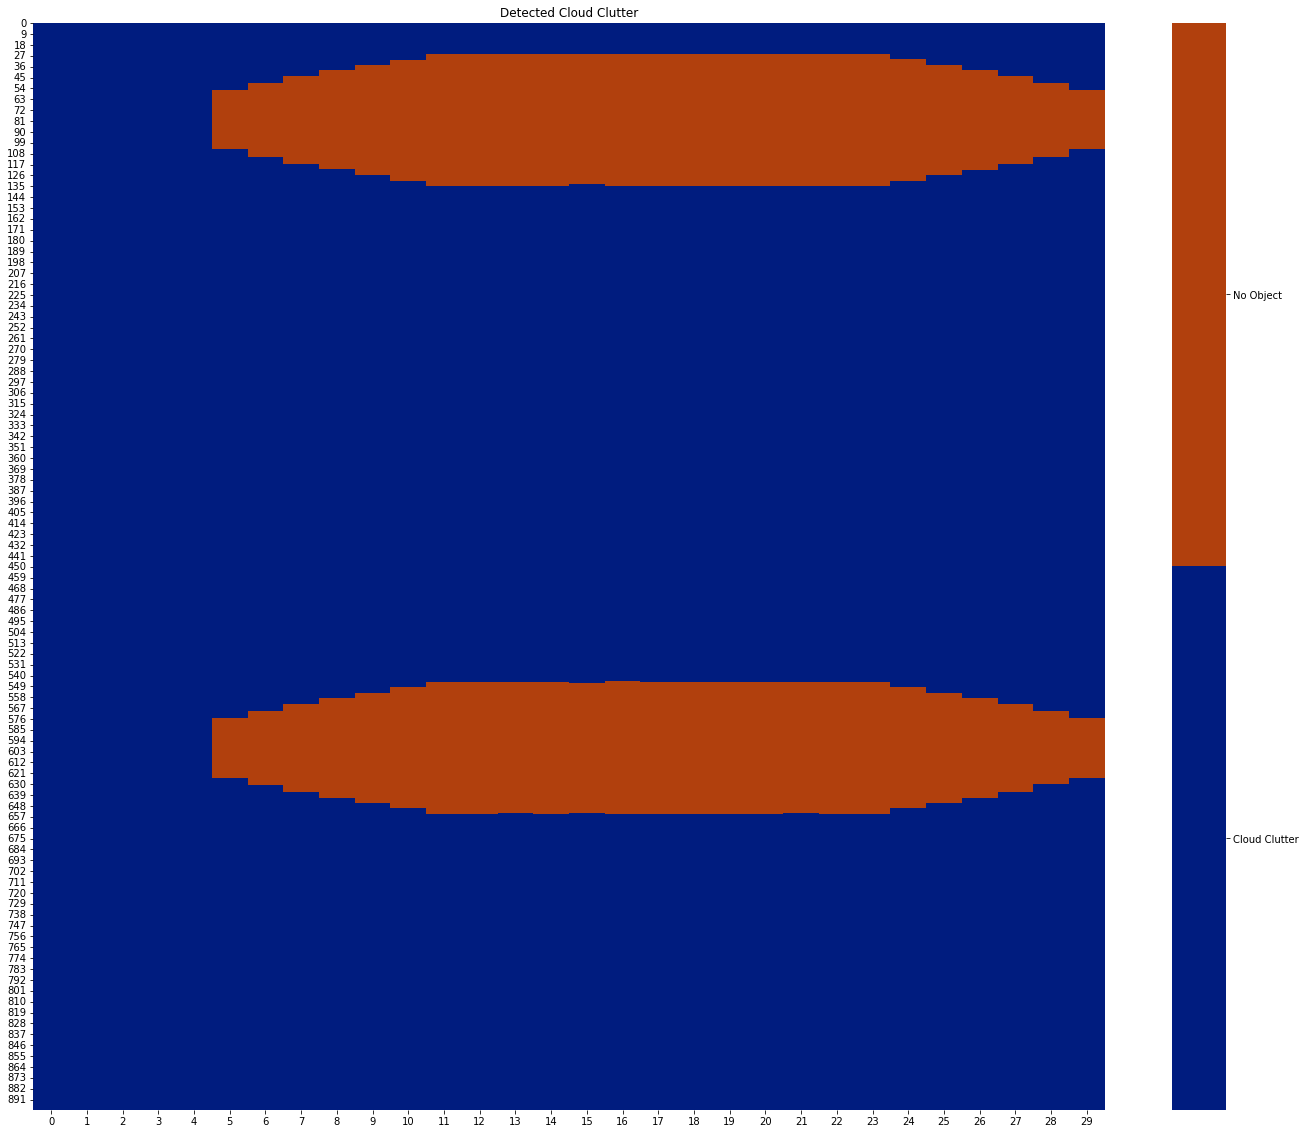

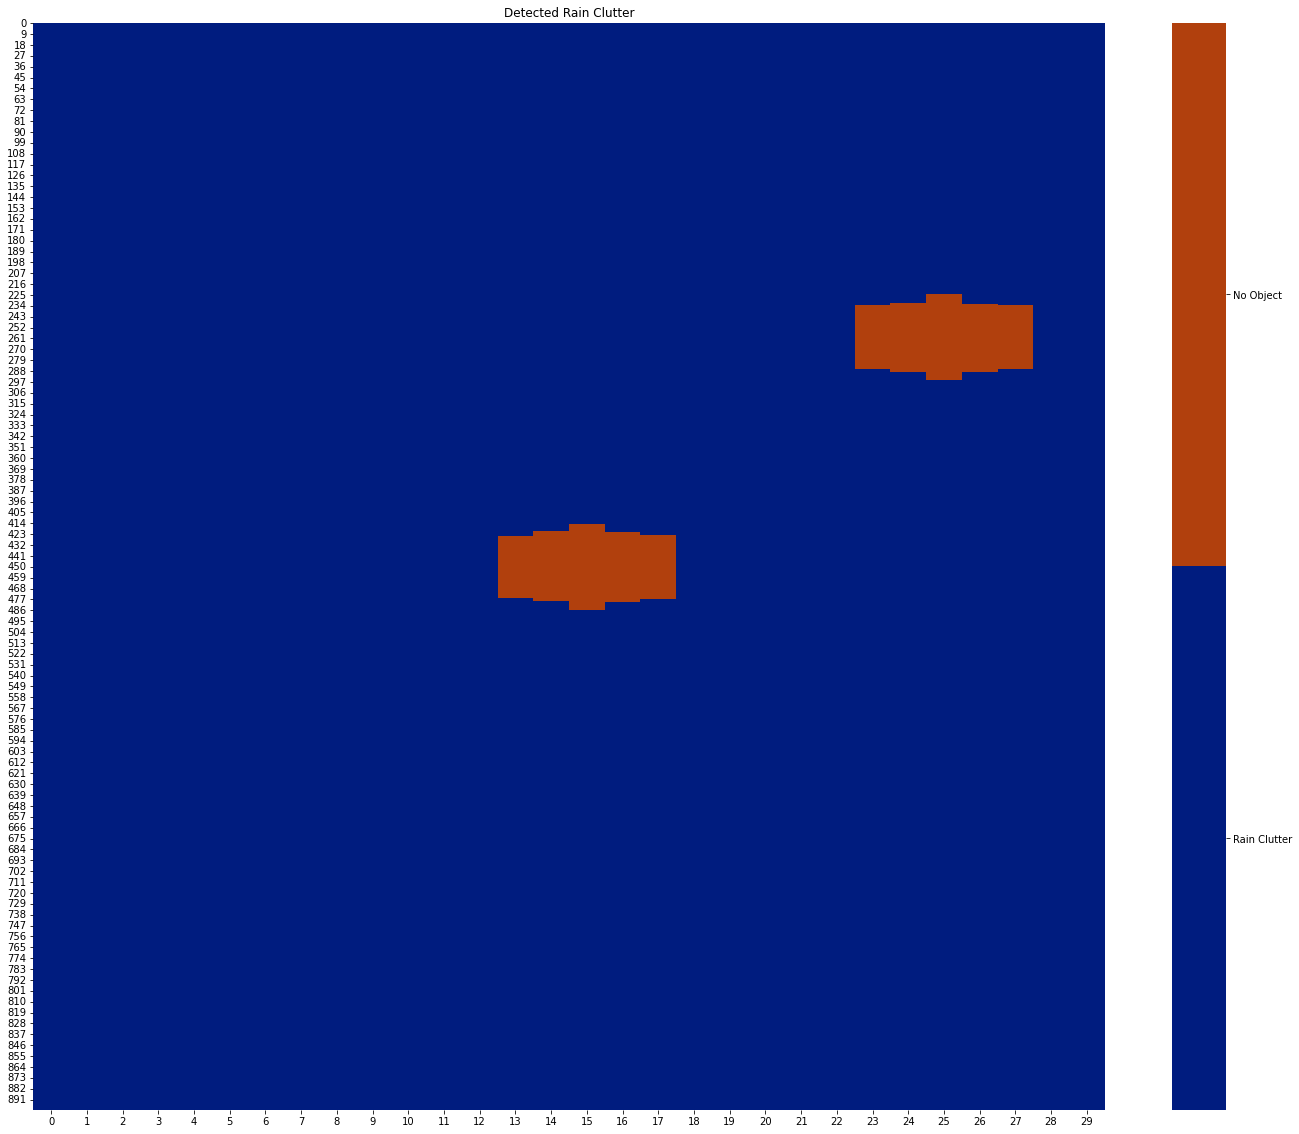

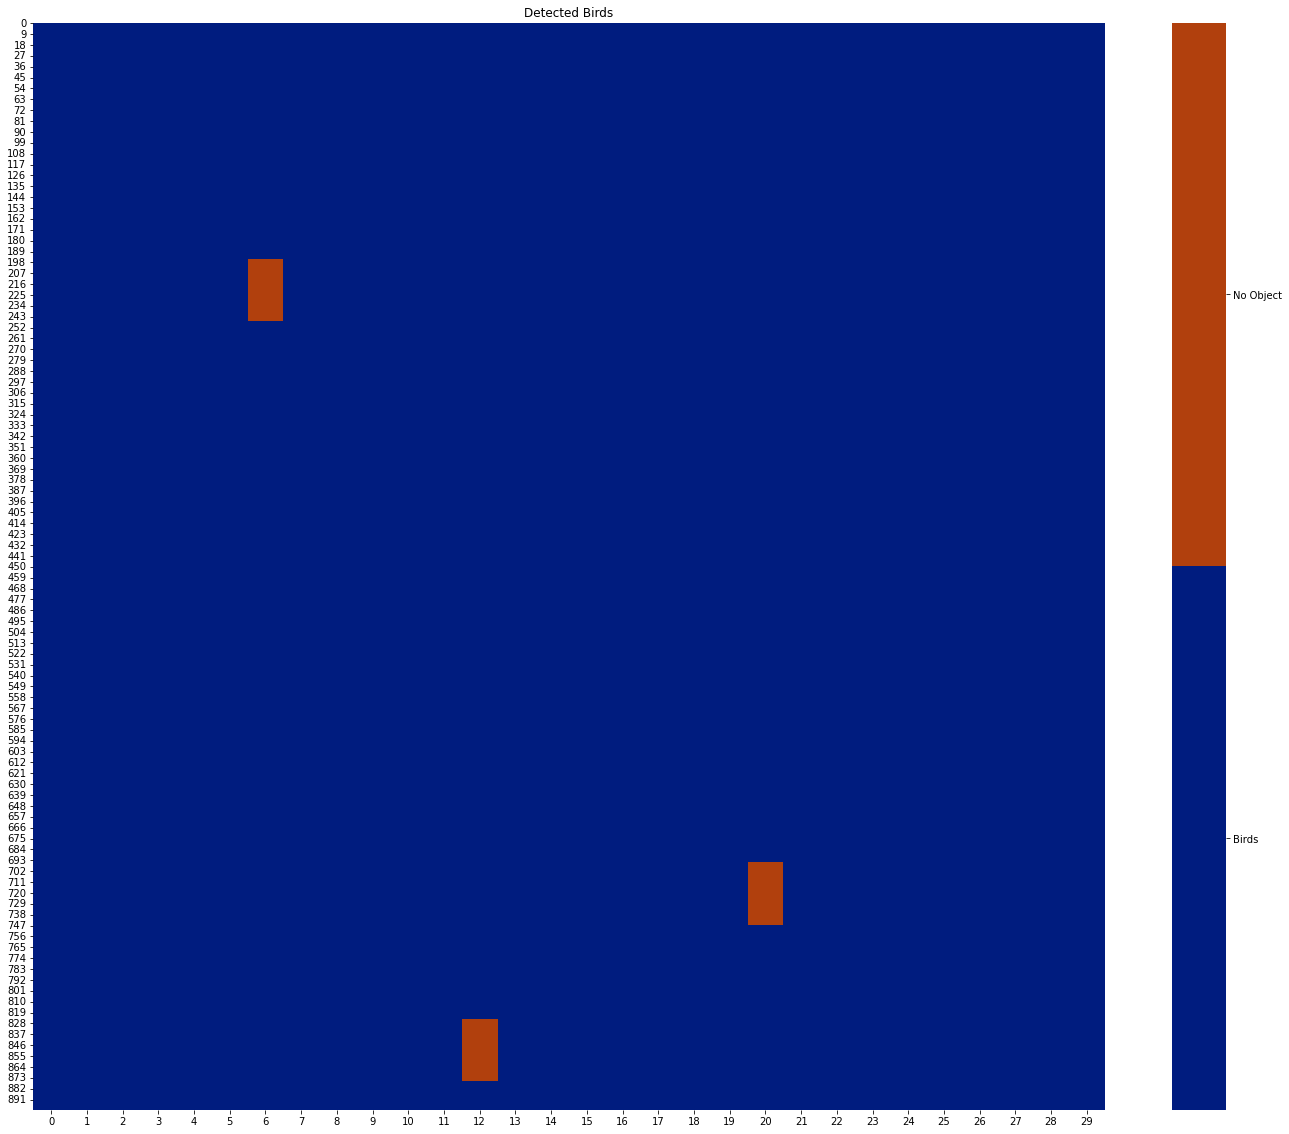

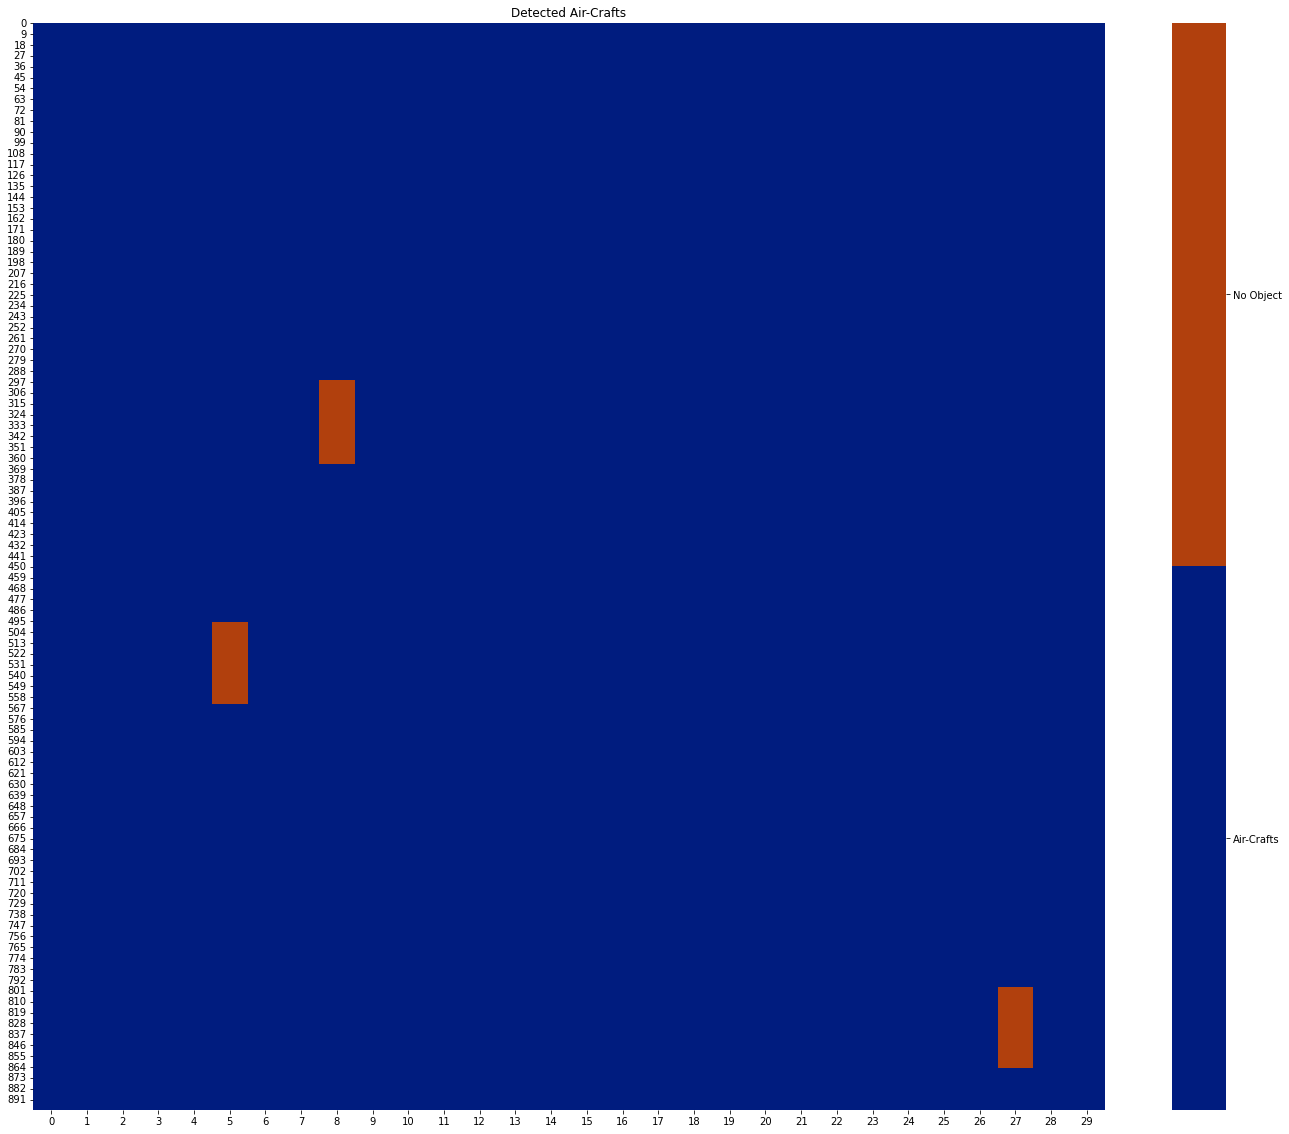

In [189]:
px = heatmap_plot(ground_clutter_data_matrix, {'Ground Clutter':1,'No Object':0}, title='Detected: Ground-clutter', cmap='dark')
np.savetxt("Ground Clutter.csv", ground_clutter_data_matrix, delimiter=",")

for keys,vals in final_dictionary.items():
    data_matrix_plot = vals[0]
    ground_clutter_data_matrix += data_matrix_plot
    title = 'Detected ' + keys
    px = heatmap_plot(data_matrix_plot, {keys:np.max(data_matrix_plot), 'No Object':0}, title='Detected '+keys, cmap='dark')

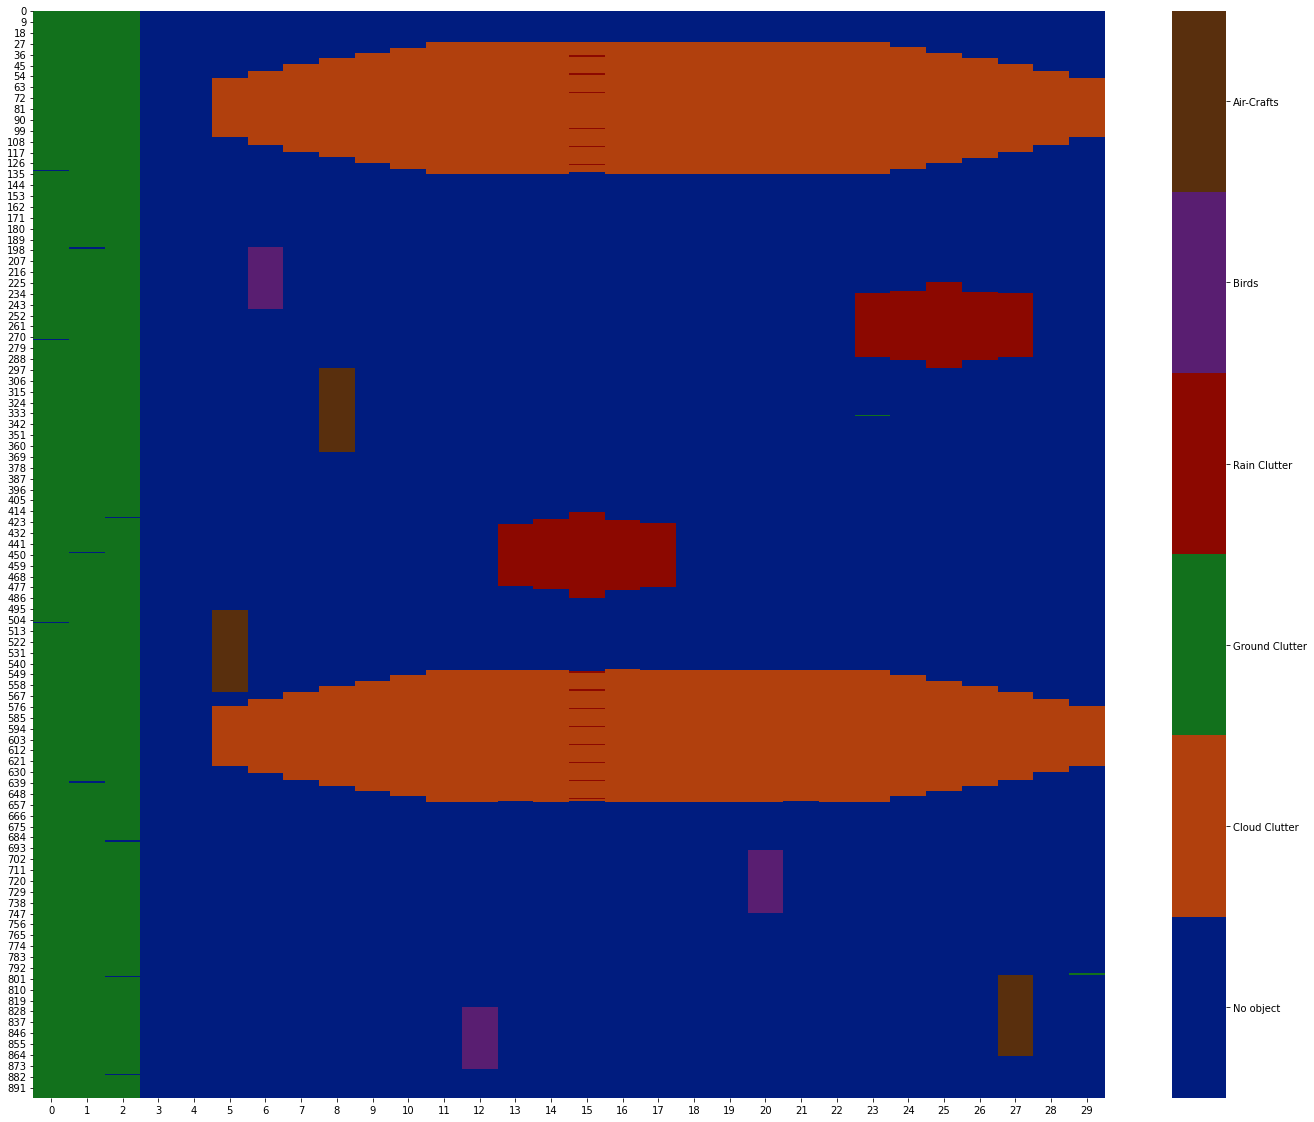

In [187]:
f,ax = plt.subplots(figsize=(24,20))

n=len(objects)
cmap = sns.color_palette('dark', n)
axis = sns.heatmap(ground_clutter_data_matrix, cmap=cmap)

colorbar = axis.collections[0].colorbar

r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(list(objects.keys()))